In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet50Model, Resnet18Model
from train import train_classifier
from utils import plot_model_metrics, oversample_dataset
from utils import reduce_dataset, split_dataset, undersample_dataset
from torchvision.transforms import v2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 128
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=2, units_per_layer=2048, dropout=0.4)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 616 training, 2,056 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2024-11-22T18:25:12.029831


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=20,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]


Train: 1/20: loss:0.6821366071701049


Epoch 1 testing: 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]


Test: 1/20: loss:0.6739915749605965, accuracy:0.6783088235294118, precision:0.14972446429895878, recall:0.864328155504626, f1:0.2520627239044003, mcc:0.2754086732982174, epoch:0


Epoch 2 training: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


Train: 2/20: loss:0.6533008217811584


Epoch 2 testing: 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]


Test: 2/20: loss:0.5791870425729191, accuracy:0.8465073529411765, precision:0.23988091978616613, recall:0.6927441839206546, f1:0.34693418603400433, mcc:0.3437940455231341, epoch:1


Epoch 3 training: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]


Train: 3/20: loss:0.5844758987426758


Epoch 3 testing: 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]


Test: 3/20: loss:0.6358531152500826, accuracy:0.6548713235294118, precision:0.14060394278940272, recall:0.8727357609710551, f1:0.238428634569204, mcc:0.26187716157427715, epoch:2


Epoch 4 training: 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


Train: 4/20: loss:0.5196315288543701


Epoch 4 testing: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]


Test: 4/20: loss:0.4055030556286083, accuracy:0.8547794117647058, precision:0.24589547105164525, recall:0.697264173734762, f1:0.35886851668590747, mcc:0.35501762592551067, epoch:3


Epoch 5 training: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


Train: 5/20: loss:0.4268863916397095


Epoch 5 testing: 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]


Test: 5/20: loss:0.4362739359631258, accuracy:0.8010110294117647, precision:0.21964966486248305, recall:0.8282475694240401, f1:0.34197736909670723, mcc:0.3618482332498975, epoch:4


Epoch 6 training: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


Train: 6/20: loss:0.3690627098083496


Epoch 6 testing: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]


Test: 6/20: loss:0.4415365606546402, accuracy:0.8138786764705882, precision:0.2112173021978317, recall:0.8096207713854774, f1:0.32942960361813745, mcc:0.34791344406589, epoch:5


Epoch 7 training: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]


Train: 7/20: loss:0.3302848696708679


Epoch 7 testing: 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]


Test: 7/20: loss:0.4072609876885134, accuracy:0.8396139705882353, precision:0.23101557112733026, recall:0.753599831541008, f1:0.34631774297784773, mcc:0.35453065342990325, epoch:6


Epoch 8 training: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]


Train: 8/20: loss:0.29314764142036437


Epoch 8 testing: 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]


Test: 8/20: loss:0.4843788427465102, accuracy:0.8092830882352942, precision:0.24030035030607558, recall:0.8777100350629762, f1:0.3714180494936845, mcc:0.3911928979415336, epoch:7


Epoch 9 training: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


Train: 9/20: loss:0.3047161102294922


Epoch 9 testing: 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]


Test: 9/20: loss:0.45328808006118326, accuracy:0.8368566176470589, precision:0.23667356978053072, recall:0.7794225382460677, f1:0.3590619229519763, mcc:0.3712907145186364, epoch:8


Epoch 10 training: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Train: 10/20: loss:0.28199400305747985


Epoch 10 testing: 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]


Test: 10/20: loss:0.5452305201221915, accuracy:0.7807904411764706, precision:0.21537061453695566, recall:0.8296430693489517, f1:0.33701040745664673, mcc:0.3583738567138034, epoch:9


Epoch 11 training: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


Train: 11/20: loss:0.30320494174957274


Epoch 11 testing: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]


Test: 11/20: loss:0.3054207922781215, accuracy:0.8832720588235294, precision:0.2896692395010789, recall:0.7123143196672608, f1:0.40393261797464275, mcc:0.400836299618401, epoch:10


Epoch 12 training: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


Train: 12/20: loss:0.27958497405052185


Epoch 12 testing: 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]


Test: 12/20: loss:0.545325203853495, accuracy:0.7918198529411765, precision:0.20706700699748534, recall:0.8502270605211781, f1:0.3303978039936587, mcc:0.3555835434497994, epoch:11


Epoch 13 training: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]


Train: 13/20: loss:0.25767972469329836


Epoch 13 testing: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]


Test: 13/20: loss:0.43712509379667397, accuracy:0.8350183823529411, precision:0.24312534914660683, recall:0.8156565656565656, f1:0.3710041248989683, mcc:0.38800432082114905, epoch:12


Epoch 14 training: 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]


Train: 14/20: loss:0.22460348904132843


Epoch 14 testing: 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]


Test: 14/20: loss:0.38270902370705323, accuracy:0.8497242647058824, precision:0.2602568085435843, recall:0.8024509803921568, f1:0.3863040292429348, mcc:0.4002270440812107, epoch:13


Epoch 15 training: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


Train: 15/20: loss:0.22472393810749053


Epoch 15 testing: 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]


Test: 15/20: loss:0.4655993352918064, accuracy:0.8276654411764706, precision:0.2619200794786347, recall:0.8816526610644257, f1:0.3955264262407078, mcc:0.41600170885445126, epoch:14


Epoch 16 training: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]


Train: 16/20: loss:0.2160885065793991


Epoch 16 testing: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]


Test: 16/20: loss:0.36470568881315346, accuracy:0.8556985294117647, precision:0.30912385943799997, recall:0.8336163836163837, f1:0.4374426179391857, mcc:0.4421781682235742, epoch:15


Epoch 17 training: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]


Train: 17/20: loss:0.2207956701517105


Epoch 17 testing: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]


Test: 17/20: loss:0.7466763520942015, accuracy:0.7325367647058824, precision:0.19049496497714788, recall:0.9048064680417621, f1:0.31305389191535127, mcc:0.3357569351409638, epoch:16


Epoch 18 training: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


Train: 18/20: loss:0.207830011844635


Epoch 18 testing: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]


Test: 18/20: loss:0.3584657131749041, accuracy:0.8653492647058824, precision:0.26566570069127615, recall:0.7056128512010865, f1:0.37871506498409174, mcc:0.3771767377512153, epoch:17


Epoch 19 training: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


Train: 19/20: loss:0.17366990447044373


Epoch 19 testing: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]


Test: 19/20: loss:0.582665354013443, accuracy:0.7973345588235294, precision:0.21117052452704385, recall:0.823832213538096, f1:0.3293905621094852, mcc:0.34998012630526293, epoch:18


Epoch 20 training: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


Train: 20/20: loss:0.2193387731909752


Epoch 20 testing: 100%|██████████| 17/17 [00:06<00:00,  2.64it/s]


Test: 20/20: loss:0.3632876084131353, accuracy:0.8727022058823529, precision:0.33111314200596187, recall:0.7939160512689925, f1:0.4546452593841381, mcc:0.45309374386116524, epoch:19


Training ends 2024-11-22T18:27:47.398228
Test accuracy: 0.8727022058823529
Test precision: 0.33111314200596187
Test recall: 0.7939160512689925
Test f1: 0.4546452593841381
Test mcc: 0.45309374386116524


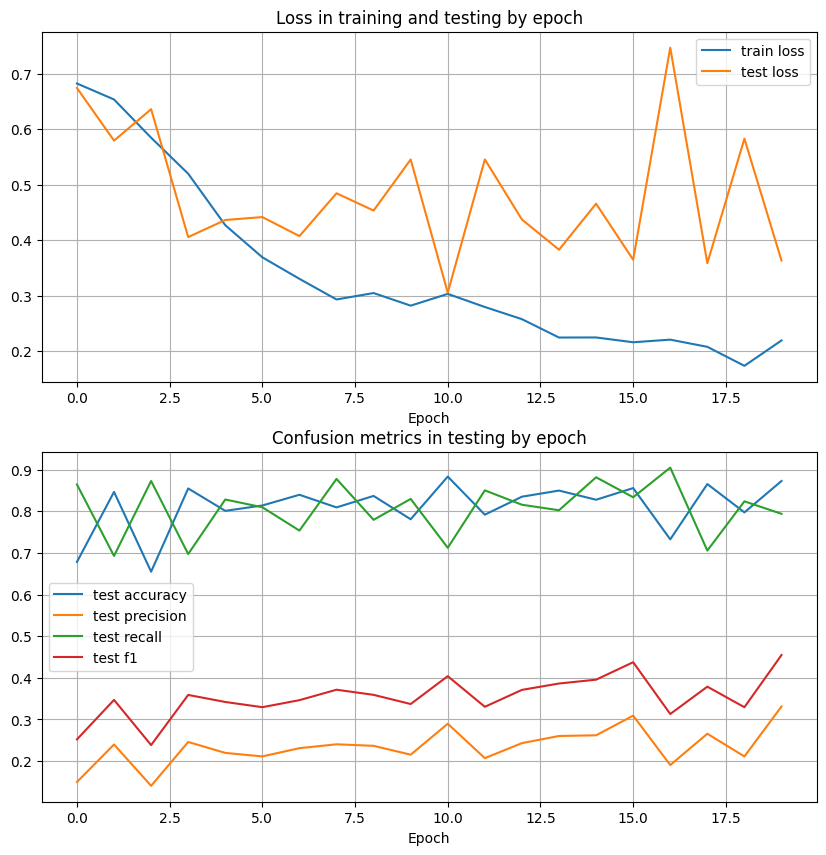

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model,"model.pth")